# Using Tensorflow lite models for serverless AWS Lambda functions 👖

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [2]:
model = keras.models.load_model("data/xception_v4_large_08_0.894.h5")

2021-11-27 17:09:55.004427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-27 17:09:55.004450: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-27 17:09:55.004467: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sleepypioneer-TravelMate-P259-G2-M): /proc/driver/nvidia/version does not exist
2021-11-27 17:09:55.004650: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
!wget http://bit.ly/mlbookcamp-pants -O data/pants.jpeg

--2021-11-27 17:09:56--  http://bit.ly/mlbookcamp-pants
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/test/pants/4aabd82c-82e1-4181-a84d-d0c6e550d26d.jpg [following]
--2021-11-27 17:09:56--  https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/test/pants/4aabd82c-82e1-4181-a84d-d0c6e550d26d.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23048 (23K) [image/jpeg]
Saving to: ‘data/pants.jpeg’

data/pants.jpeg     100%[===================>]  22.51K  --.-KB/s    in 0.007s  

2021-11-27 17:09:57 (3.07 MB/s) - ‘da

In [4]:
img = load_img("data/pants.jpeg", target_size=(299, 299))

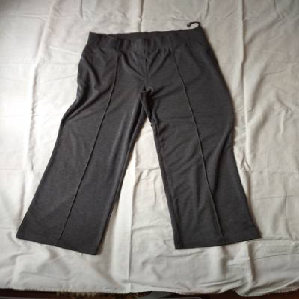

In [5]:
img

In [6]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [7]:
preds = model.predict(X)

2021-11-27 17:09:57.649560: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
classes = [
    "dress",
    "hat",
    "longsleeve",
    "outwear",
    "pants",
    "shirt",
    "shoes",
    "shorts",
    "skirt",
    "t-shirt"
]

In [9]:
dict(zip(classes, preds[0]))

{'dress': -1.8682902,
 'hat': -4.761245,
 'longsleeve': -2.3169835,
 'outwear': -1.0625703,
 'pants': 9.887159,
 'shirt': -2.8124335,
 'shoes': -3.666283,
 'shorts': 3.2003615,
 'skirt': -2.6023383,
 't-shirt': -4.8350453}

### Convert keras to TF-Lite 🧐

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open("data/clothing-model.tflite", "wb") as f_out:
    f_out.write(tflite_model)

2021-11-27 17:10:05.834997: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpfd7mivg_/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
2021-11-27 17:10:16.082038: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-27 17:10:16.082155: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-27 17:10:16.088654: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.01ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-11-27 17:10:18.023264: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-27 17:10:18.0233

In [11]:
!ls -lh data/

total 163M
drwxrwxrwx 1 jovyan 1000    0 Sep 26 19:57 airbnb_data
drwxrwxrwx 1 jovyan 1000 4.0K Nov 18 19:47 clothing-dataset-small
-rwxrwxrwx 1 jovyan 1000  81M Nov 27 17:10 clothing-model.tflite
drwxrwxrwx 1 jovyan 1000    0 Oct 14 21:52 credit_risk
-rwxrwxrwx 1 jovyan 1000 179K Nov 27 16:31 CreditScoring.csv
-rwxrwxrwx 1 jovyan 1000  15K Jun 16  2015 hat.jpeg
-rwxrwxrwx 1 jovyan 1000  23K Nov 27 17:09 pants.jpeg
drwxrwxrwx 1 jovyan 1000    0 Sep 23 12:18 telco_customer_churn
-rwxrwxrwx 1 jovyan 1000  83M Nov 27 16:31 xception_v4_large_08_0.894.h5


## Using the TF Lite model ✨

In [12]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path="data/clothing-model.tflite")
interpreter.allocate_tensors() # takes model's weights and adds them to the interpreter **IMPORTANT to do this**

In [14]:
interpreter.get_input_details()
# index says which part of the model is where the input should fo

[{'name': 'input_8',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [15]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [16]:
interpreter.set_tensor(input_index, X) # initialise the input of the intepreter with the X value

In [17]:
interpreter.invoke()

In [18]:
# invoke all the computation in the NN, we passed through the base model and layers of the Neural network

# now the results are sat in the output_index

preds_2 = interpreter.get_tensor(output_index)

In [19]:
dict(zip(classes, preds_2[0]))

{'dress': -1.8682901,
 'hat': -4.7612457,
 'longsleeve': -2.3169823,
 'outwear': -1.0625706,
 'pants': 9.8871565,
 'shirt': -2.8124304,
 'shoes': -3.6662836,
 'shorts': 3.200361,
 'skirt': -2.6023388,
 't-shirt': -4.835045}

## Putting it together & removing TF dependency 👒

In [20]:
!wget https://www.taghats.com/wp-content/uploads/2015/06/Cowboy-Hat-for-Kids.jpg -O data/hat.jpeg

--2021-11-27 17:10:21--  https://www.taghats.com/wp-content/uploads/2015/06/Cowboy-Hat-for-Kids.jpg
Resolving www.taghats.com (www.taghats.com)... 204.197.245.130
Connecting to www.taghats.com (www.taghats.com)|204.197.245.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14493 (14K) [image/jpeg]
Saving to: ‘data/hat.jpeg’

data/hat.jpeg       100%[===================>]  14.15K  --.-KB/s    in 0.1s    

2021-11-27 17:10:21 (141 KB/s) - ‘data/hat.jpeg’ saved [14493/14493]



In [26]:
from PIL import Image
from tflite_runtime import tflite # instead of installing it from the whole of tensorflow

In [27]:
def import_data(file_path, target_size):
    # use PIL to import image instead of keras
    with Image.open(file_path) as img:
        img = img.resize(target_size, Image.NEAREST)
        
    return img

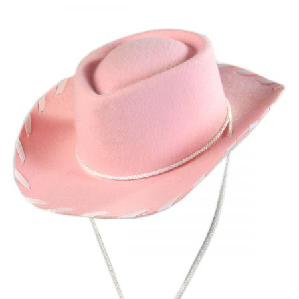

In [28]:
file_path = "data/hat.jpeg"
target_size = (299,299)

img_hat = import_data(file_path, target_size)
img_hat

In [29]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x


def preprocess(img):
    x = np.array(img, dtype="float32")
    X = np.array([x])
    
    # use own function instead of keras preprocess_input
    X = preprocess_input(X)
    return X


def get_predictions(interpreter, classes, X):
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    
    interpreter.set_tensor(input_index, X)
    interpreter.invoke()
    preds = interpreter.get_tensor(output_index)
    
    return dict(zip(classes, preds[0]))


X = preprocess(img_hat)
interpreter = tflite.Interpreter(model_path="data/clothing-model.tflite")
interpreter.allocate_tensors() 
predictions = get_predictions(interpreter, classes, X)
predictions

{'dress': 1.2032902,
 'hat': 9.474733,
 'longsleeve': -1.5912198,
 'outwear': -1.9175507,
 'pants': -1.6794889,
 'shirt': -3.5823717,
 'shoes': 4.326652,
 'shorts': -3.755344,
 'skirt': -2.618848,
 't-shirt': -3.7004054}

## Simpler way

Use Keras Image helper:https://github.com/alexeygrigorev/keras-image-helper